# Imports

In [24]:
from IPython.display import display

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters() # just to ensure that pd DateTime objects are not needed to be type-casted to matplotlib types

# Time Series libraries
from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from time import time
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

# ADF test and checking for stationarity.


In [3]:
def check_stationarity(ts):
    dftest = adfuller(ts)
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary')
    else:
        print('The series is NOT stationary')

## ETL (Extract Transform Load)

In [4]:
# def parser(s):
#     return datetime.strptime(s, '%Y-%m-%d')

## change catfisj_sales to tatasteel_df

#read data
tatasteel_df = pd.read_csv('TATASTEEL.NS.csv', index_col=False)


#dekhte hei zara dataset ko
tatasteel_df.head()

Series         Date  Prev Close  Open Price  High Price  Low Price  Last Price  Close Price  Average Price  Total Traded Quantity      Turnover  No. of Trades
0     EQ  27-Aug-2021     1375.05     1379.00     1394.45    1375.85     1382.40      1384.15        1385.73                7394081  1.024618e+10         148295
1     EQ  30-Aug-2021     1384.15     1399.00     1445.00    1398.00     1436.70      1440.60        1430.46               13444387  1.923170e+10         264920
2     EQ  31-Aug-2021     1440.60     1445.00     1459.00    1432.00     1447.10      1450.25        1449.25               24752108  3.587192e+10         241285
3     EQ  01-Sep-2021     1450.25     1451.25     1455.50    1407.00     1410.95      1411.20        1422.05                8812897  1.253236e+10         188156
4     EQ  02-Sep-2021     1411.20     1411.00     1432.00    1410.00     1424.90      1425.10        1421.37                6148046  8.738634e+09         135353

In [5]:
##removing the column 'Series'
tatasteel_df.drop('Series', axis=1, inplace=True)

# #Converting month name to number but for this to work the Date column should not be the index column
tatasteel_df['Date'] = pd.DatetimeIndex(tatasteel_df['Date']).date

In [6]:
tatasteel_df.head()

Date  Prev Close  Open Price  High Price  Low Price  Last Price  Close Price  Average Price  Total Traded Quantity      Turnover  No. of Trades
0  2021-08-27     1375.05     1379.00     1394.45    1375.85     1382.40      1384.15        1385.73                7394081  1.024618e+10         148295
1  2021-08-30     1384.15     1399.00     1445.00    1398.00     1436.70      1440.60        1430.46               13444387  1.923170e+10         264920
2  2021-08-31     1440.60     1445.00     1459.00    1432.00     1447.10      1450.25        1449.25               24752108  3.587192e+10         241285
3  2021-09-01     1450.25     1451.25     1455.50    1407.00     1410.95      1411.20        1422.05                8812897  1.253236e+10         188156
4  2021-09-02     1411.20     1411.00     1432.00    1410.00     1424.90      1425.10        1421.37                6148046  8.738634e+09         135353

In [7]:
tatasteel_df.head(-5)

Date  Prev Close  Open Price  High Price  Low Price  Last Price  Close Price  Average Price  Total Traded Quantity      Turnover  No. of Trades
0    2021-08-27     1375.05     1379.00     1394.45    1375.85     1382.40      1384.15        1385.73                7394081  1.024618e+10         148295
1    2021-08-30     1384.15     1399.00     1445.00    1398.00     1436.70      1440.60        1430.46               13444387  1.923170e+10         264920
2    2021-08-31     1440.60     1445.00     1459.00    1432.00     1447.10      1450.25        1449.25               24752108  3.587192e+10         241285
3    2021-09-01     1450.25     1451.25     1455.50    1407.00     1410.95      1411.20        1422.05                8812897  1.253236e+10         188156
4    2021-09-02     1411.20     1411.00     1432.00    1410.00     1424.90      1425.10        1421.37                6148046  8.738634e+09         135353
..          ...         ...         ...         ...        ...         ...          ...            ...                    ...           ...            ...
242  2022-08-12      109.10      109.35      112.90     108.80      112.80       112.65         111.88               95942333  1.073361e+10         307921
243  2022-08-16      112.65      113.70      113.70     111.10      113.00       113.00         112.55               69207437  7.789101e+09         238391
244  2022-08-17      113.00      113.50      113.50     112.25      112.40       112.50         112.85               54008422  6.095000e+09         207669
245  2022-08-18      112.50      112.50      113.00     111.40      112.70       112.55         112.33               49396425  5.548516e+09         179401
246  2022-08-19      112.55      112.55      112.90     109.55      109.75       110.05         111.08               57134813  6.346786e+09         227022

[247 rows x 11 columns]

In [8]:
tatasteel_df2 = tatasteel_df.iloc[:, [0,2]]

In [9]:
tatasteel_df2['Date'] = pd.to_datetime(tatasteel_df2['Date'], format='%Y-%m-%d')

In [10]:
tatasteel_df2.head()

Date  Open Price
0 2021-08-27     1379.00
1 2021-08-30     1399.00
2 2021-08-31     1445.00
3 2021-09-01     1451.25
4 2021-09-02     1411.00

In [11]:
tatasteel_df2.head(-5)

Date  Open Price
0   2021-08-27     1379.00
1   2021-08-30     1399.00
2   2021-08-31     1445.00
3   2021-09-01     1451.25
4   2021-09-02     1411.00
..         ...         ...
242 2022-08-12      109.35
243 2022-08-16      113.70
244 2022-08-17      113.50
245 2022-08-18      112.50
246 2022-08-19      112.55

[247 rows x 2 columns]

In [12]:
# #transform
# start_date = datetime(2021,8,30)
# end_date = datetime(2022,8,18)
# lim_tatasteel_df2 = tatasteel_df2[start_date:end_date] #limited range

# plt.rc('figure',figsize=(14,8))
# plt.rc('font',size=15)


In [13]:

#infer the frequency of the data
#tatasteel_df = tatasteel_df.asfreq(pd.infer_freq(tatasteel_df.index))

# #transform
# start_date = datetime(2021-08-27)
# end_date = datetime(2022-08-19)
# lim_tatasteel_df = tatasteel_df[start_date:end_date] #limited range

# #plot
# plt.figure(figsize=(14,4))
# plt.plot(lim_tatasteel_df)
# plt.title('opening price', fontsize=20)
# plt.ylabel('Sales', fontsize=16)

# plt.figure(figsize=(60,40))
# plt.grid(True)
# plt.xlabel('Date')
# plt.ylabel('Open Prices')
# tatasteel_df2[['Date', 'Open Price']].plot()
# plt.title('Tatasteel opening price')
# plt.show()

tatasteel_df2 = tatasteel_df2.set_index('Date')
tatasteel_df2.plot(rot=0, title='Open price', figsize=(15,10), fontsize=12)

In [14]:
tatasteel_df2.head()

Open Price
Date                  
2021-08-27     1379.00
2021-08-30     1399.00
2021-08-31     1445.00
2021-09-01     1451.25
2021-09-02     1411.00

In [15]:
check_stationarity(tatasteel_df2)

The series is NOT stationary


## STL Decomposition

In [16]:
# plt.rc('figure',figsize=(14,8))
# plt.rc('font',size=15)
# # tatasteel_df2['Date'] = pd.to_numeric(pd.to_datetime(tatasteel_df2['Date']))
# # result = seasonal_decompose(tatasteel_df2,model='additive')
# # fig = result.plot()

# import statsmodels as sm
# import statsmodels.api as sm
# decomposition = sm.tsa.seasonal_decompose(tatasteel_df2, model = 'additive', period = 1)
# fig = decomposition.plot()
# # matplotlib.rcParams['figure.figsize'] = [9.0,5.0]

from statsmodels.tsa.seasonal import seasonal_decompose
def decompose(df, column_name):
    """
    A function that returns the trend, seasonality and residual captured by applying both multiplicative and
    additive model.
    df -> DataFrame
    column_name -> column_name for which trend, seasonality is to be captured
    """
    result_mul = seasonal_decompose(df[column_name], model='multiplicative', extrapolate_trend = 'freq', period = 10)
    result_add = seasonal_decompose(df[column_name], model = 'additive', extrapolate_trend='freq', period = 10)

    plt.rcParams.update({'figure.figsize': (20, 10)})
    result_mul.plot().suptitle('Multiplicative Decompose', fontsize=30)
    result_add.plot().suptitle('Additive Decompose', fontsize=30)
    plt.show()
    
    return result_mul, result_add

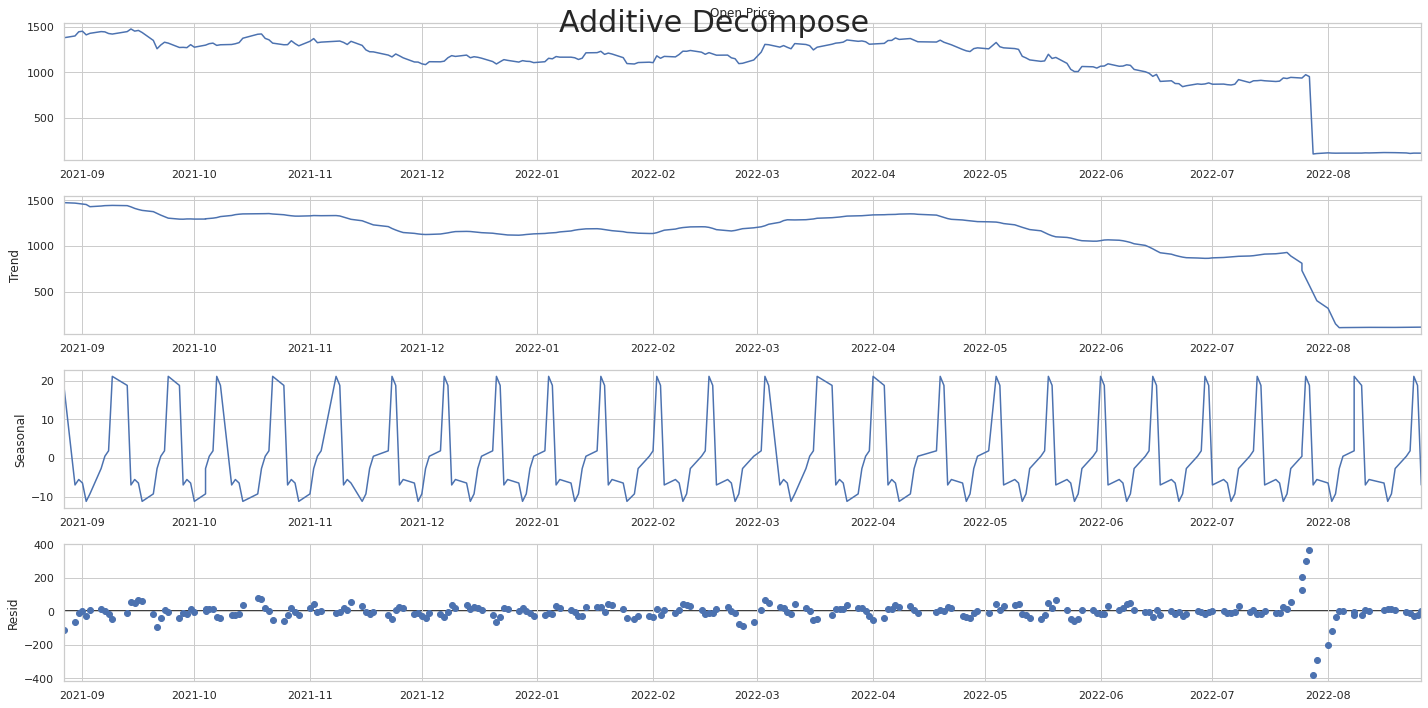

In [17]:
result_mul, result_add = decompose(tatasteel_df2, 'Open Price')

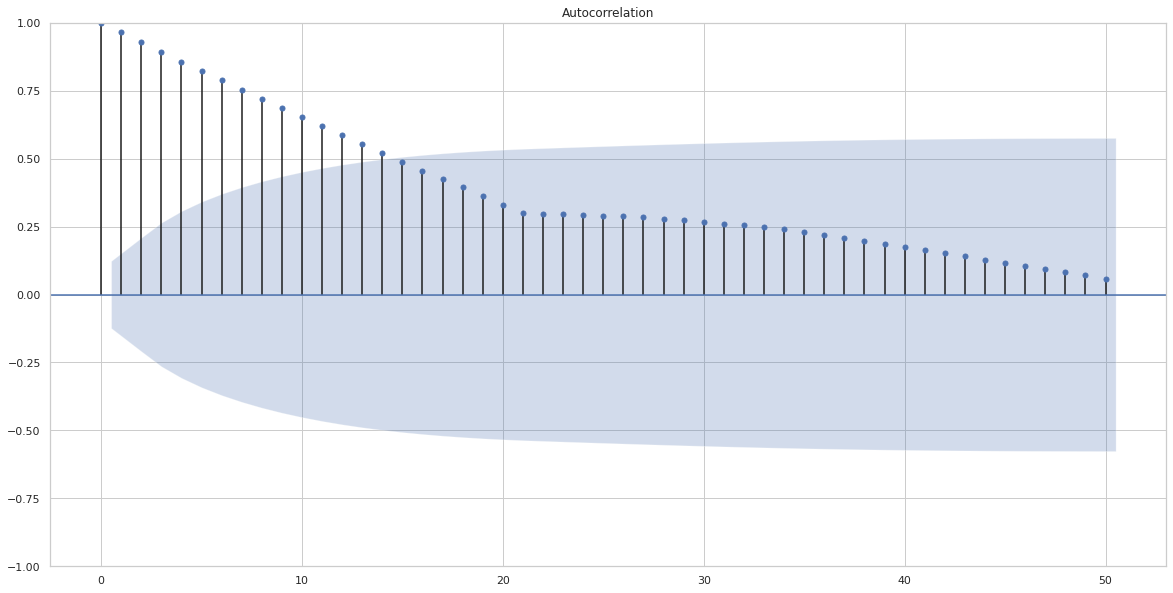

In [18]:
plot_acf(tatasteel_df2['Open Price'], lags=50);

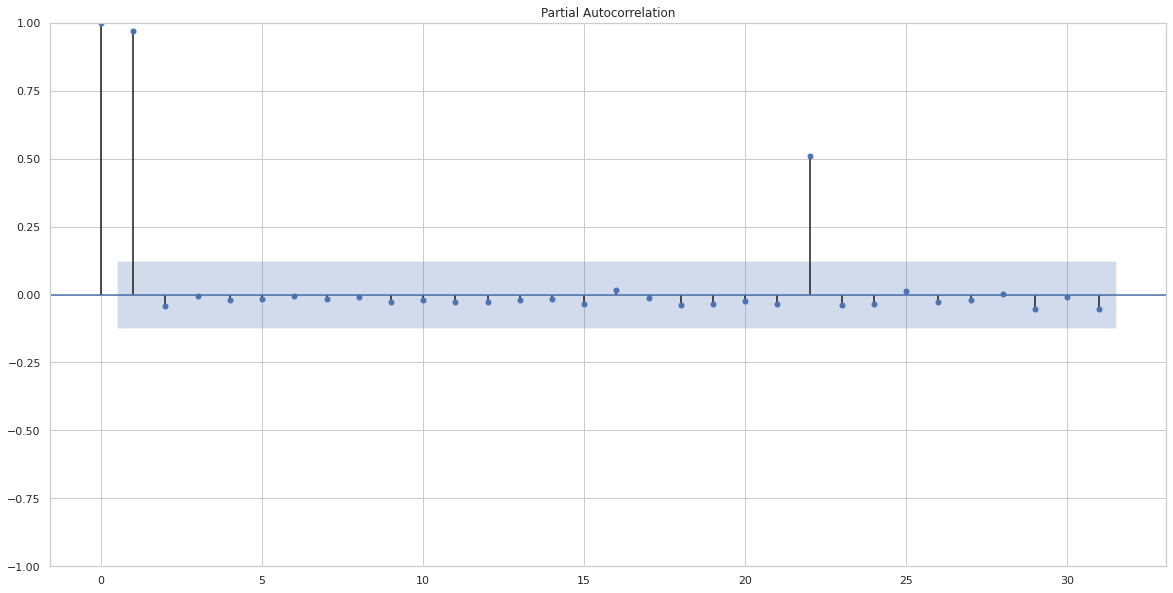

In [19]:
plot_pacf(tatasteel_df2['Open Price'], lags=31);

## Fitting ARIMA

In [20]:
arima = sm.tsa.arima.ARIMA(tatasteel_df2['Open Price'], order=(12,1,1))
predictions = arima.fit().predict()

In [21]:
plt.figure(figsize=(16,4))
plt.plot(tatasteel_df2.diff(), label="Actual")
plt.plot(predictions, label="Predicted")
plt.title('Open price', fontsize=20)
plt.ylabel('Price', fontsize=16)
plt.legend()

## SARIMA

In [25]:
sarima = SARIMAX(tatasteel_df2['Open Price'], 
                order=(1,1,1), 
                seasonal_order=(1,1,0,12))
predictions = sarima.fit().predict()

In [26]:
plt.figure(figsize=(16,4))
plt.plot(tatasteel_df2, label="Actual")
plt.plot(predictions, label="Predicted")
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
plt.legend()